## Mengimport data menggunakan pandas

In [1]:
import pandas as pd
import numpy as np

In [2]:
data_train = pd.read_csv('.\DatasetEskperimen\CensusIncome\CencusIncome.data.txt')
data_test = pd.read_csv('.\DatasetEskperimen\CensusIncome\CencusIncome.test.txt')

In [3]:
data = pd.concat([data_train, data_test], keys=['train', 'test'])

## Mengubah kolom class menjadi numerik

In [4]:
def changeClassToNumber(x):
    if x == '<=50K':
        return 0
    elif x == '>50K':
        return 1
    else:
        return -1

In [5]:
data['class'] = data['class'].map(lambda x: changeClassToNumber(x))

## Menghandle missing value

In [6]:
print("Banyaknya data:", len(data))
print("--------------------------------------------------------------------")
print(data.info())

Banyaknya data: 48842
--------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 48842 entries, (train, 0) to (test, 16280)
Data columns (total 15 columns):
age               48842 non-null int64
workclass         46043 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
education-num     48842 non-null int64
marital-status    48842 non-null object
occupation        46033 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital-gain      48842 non-null int64
capital-loss      48842 non-null int64
hours-per-week    48842 non-null int64
native-country    47985 non-null object
class             48842 non-null int64
dtypes: int64(7), object(8)
memory usage: 6.0+ MB
None


Karena object yang memiliki missing value adalah object, maka missing value akan digantikan dengan nilai modus dari kolom tersebut

In [7]:
data["workclass"].fillna(data["workclass"].mode()[0], inplace=True)
data["occupation"].fillna(data["occupation"].mode()[0], inplace=True)
data["native-country"].fillna(data["native-country"].mode()[0], inplace=True)

In [8]:

data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 48842 entries, (train, 0) to (test, 16280)
Data columns (total 15 columns):
age               48842 non-null int64
workclass         48842 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
education-num     48842 non-null int64
marital-status    48842 non-null object
occupation        48842 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital-gain      48842 non-null int64
capital-loss      48842 non-null int64
hours-per-week    48842 non-null int64
native-country    48842 non-null object
class             48842 non-null int64
dtypes: int64(7), object(8)
memory usage: 6.0+ MB


In [9]:
def one_hot_encode(df, label):
    onehot = pd.get_dummies(df[label],prefix=label)
    df.drop(label, axis=1,inplace = True)
    return df.join(onehot)

In [10]:
def changeSexToNumber(x):
    if x == 'Female':
        return 0
    elif x == 'Male':
        return 1
    else:
        return np.nan

#data.drop('race',axis=1, inplace=True)
#data.drop('native-country',axis=1, inplace=True)

In [11]:
data = one_hot_encode(data.drop("class", axis=1), "workclass").join(data["class"])
data = one_hot_encode(data.drop("class", axis=1), "education").join(data["class"])
data = one_hot_encode(data.drop("class", axis=1), "marital-status").join(data["class"])
data = one_hot_encode(data.drop("class", axis=1), "occupation").join(data["class"])
data = one_hot_encode(data.drop("class", axis=1), "relationship").join(data["class"])
data = one_hot_encode(data.drop("class", axis=1), "race").join(data["class"])
data = one_hot_encode(data.drop("class", axis=1), "native-country").join(data["class"])
data['sex'] = data['sex'].map(lambda x: changeSexToNumber(x))

In [12]:
data.drop('fnlwgt',axis=1, inplace=True)
#data.drop('hours-per-week',axis=1, inplace=True)

In [13]:
data

age  education-num  sex  capital-gain  capital-loss  \
train 0       39             13    1          2174             0   
      1       50             13    1             0             0   
      2       38              9    1             0             0   
      3       53              7    1             0             0   
      4       28             13    0             0             0   
      5       37             14    0             0             0   
      6       49              5    0             0             0   
      7       52              9    1             0             0   
      8       31             14    0         14084             0   
      9       42             13    1          5178             0   
      10      37             10    1             0             0   
      11      30             13    1             0             0   
      12      23             13    0             0             0   
      13      32             12    1             0             0   
      14      40             11    1             0             0   
      15      34              4    1             0             0   
      16      25              9    1             0             0   
      17      32              9    1             0             0   
      18      38              7    1             0             0   
      19      43             14    0             0             0   
      20      40             16    1             0             0   
      21      54              9    0             0             0   
      22      35              5    1             0             0   
      23      43              7    1             0          2042   
      24      59              9    0             0             0   
      25      56             13    1             0             0   
      26      19              9    1             0             0   
      27      54             10    1             0             0   
      28      39              9    1             0             0   
      29      49              9    1             0             0   
...          ...            ...  ...           ...           ...   
test  16251   81             11    1          2936             0   
      16252   60             11    1          7688             0   
      16253   39             13    0             0          1669   
      16254   38             14    1             0             0   
      16255   43             14    1             0          1902   
      16256   23              9    1             0             0   
      16257   73             10    0             0             0   
      16258   35             10    1             0             0   
      16259   66              9    0             0             0   
      16260   27             10    0             0             0   
      16261   40             15    1         15024             0   
      16262   51              9    1             0             0   
      16263   22             10    1             0             0   
      16264   64              9    1             0             0   
      16265   50             14    0             0             0   
      16266   55              9    0             0             0   
      16267   38             11    0             0             0   
      16268   58             12    1             0             0   
      16269   32              9    1             0             0   
      16270   48              9    1             0             0   
      16271   61              9    1             0             0   
      16272   31              9    1             0             0   
      16273   25              9    0             0             0   
      16274   48             14    1             0             0   
      16275   33             13    1             0             0   
      16276   39             13    0             0             0   
      16277   64              9    1             0             0   
 

In [14]:
from sklearn.preprocessing import StandardScaler
feature = data.drop("class",axis=1).columns

In [17]:
feature

Index(['age', 'education-num', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       ...
       'native-country_Portugal', 'native-country_Puerto-Rico',
       'native-country_Scotland', 'native-country_South',
       'native-country_Taiwan', 'native-country_Thailand',
       'native-country_Trinadad&Tobago', 'native-country_United-States',
       'native-country_Vietnam', 'native-country_Yugoslavia'],
      dtype='object', length=103)

In [18]:
scaler = StandardScaler()

In [19]:
data[feature] = scaler.fit_transform(data.drop("class", axis=1))

In [20]:
data.loc['train'].to_csv('train.csv',index=None)

In [21]:
data.loc['test'].to_csv('test.csv', index=None)

## Validasi Model

In [22]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [23]:
def cross_val_check(clf, data, label, k):
    folds = StratifiedKFold(n_splits=k, random_state=42, shuffle=True)
    folds.get_n_splits(data, label)
    accuracy = []
    for train_index, test_index in folds.split(data, label):
        X_train, X_test = data[train_index], data[test_index]
        y_train, y_test = label[train_index], label[test_index]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy.append(accuracy_score(y_test, y_pred))
        
    plt.title("ACCURACY PLOT")
    plt.xlabel("K-th Fold")
    plt.ylabel("Accuracy")
    plt.xticks(range(k),range(1,k+1))
    plt.plot(accuracy, 'o--')
    plt.axhline(y=np.mean(accuracy), color='r', linestyle='-')
    plt.show()
    return accuracy

In [24]:
import scipy as sp
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    print(round(m,3), "(+/-)", round(h,3))


### Decision Tree

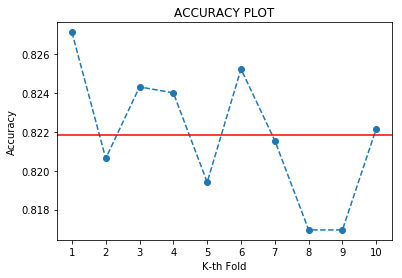

In [26]:
from sklearn.tree import DecisionTreeClassifier

DTL_clf = DecisionTreeClassifier()

acc = cross_val_check(DTL_clf, data.loc['train'].drop('class', axis=1).values, data.loc['train']['class'].values, 10)

In [27]:
print("Mean error:",end=' ')
mean_confidence_interval(acc)

Mean error: 0.822 (+/-) 0.002


### Naive Bayes

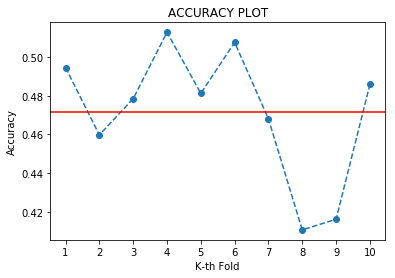

In [28]:
from sklearn.naive_bayes import GaussianNB
NB_clf = GaussianNB()
acc_NB = cross_val_check(NB_clf, data.loc['train'].drop('class', axis=1).values, data.loc['train']['class'].values, 10)

In [29]:
mean_confidence_interval(acc_NB)

0.472 (+/-) 0.025


### K-NN

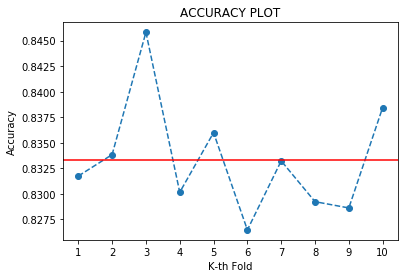

In [30]:
from sklearn.neighbors import KNeighborsClassifier
KNN_clf = KNeighborsClassifier(n_neighbors=15)
acc_KNN = cross_val_check(KNN_clf, data.loc['train'].drop('class', axis=1).values, data.loc['train']['class'].values, 10)

In [31]:
mean_confidence_interval(acc_KNN)

0.833 (+/-) 0.004


### Multi Layer Percepton

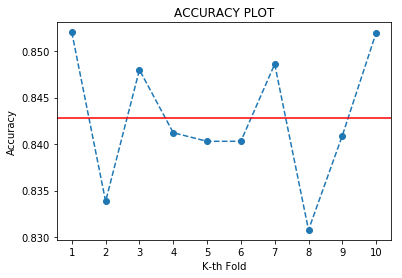

In [32]:
from sklearn.neural_network import MLPClassifier
MLP_clf = MLPClassifier(hidden_layer_sizes=(52,52),activation='logistic')
acc_MLP = cross_val_check(MLP_clf, data.loc['train'].drop('class', axis=1).values, data.loc['train']['class'].values, 10)

In [33]:
mean_confidence_interval(acc_MLP)

0.843 (+/-) 0.005


#### Dari training didapat model terbaik adalah Multi Layer Perceptron
Melakukan full-training dengan MLP dan menggabar confusion matrix-nya

In [34]:
from sklearn.metrics import confusion_matrix
import itertools


def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    with plt.xkcd():
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], '.2f'),
                     horizontalalignment="center",
                     color="black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

In [35]:
def show_matrix(y_true, y_pred):    
    cnf_matrix = confusion_matrix(y_true, y_pred)
    np.set_printoptions(precision=2)

    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=[0,1],
                      title='Confusion Matrix')
    plt.show()

### Create Model

In [36]:
final_model = MLPClassifier(hidden_layer_sizes=(52,52),activation='logistic')
final_model.fit(data.loc['train'].drop('class',axis=1).values, data.loc['train']['class'].values)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(52, 52), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

### Draw confusion matrix

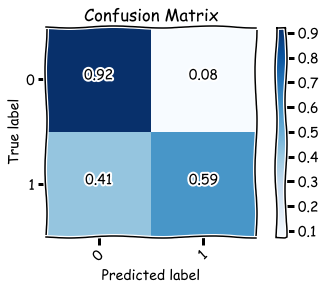

In [37]:
y_pred = final_model.predict(data.loc['test'].drop('class',axis=1).values)

show_matrix(data.loc['test']['class'].values, y_pred)